In [1]:
import pandas as pd

In [6]:
data=pd.read_csv("merged_all.csv")

In [7]:
data

,Unnamed: 0,Station ID,Ambient Temperature [°C],Surface Temperature [°C],Relative Humidity [%],Datetime
0,0,100,1.36,-0.463,74.662,2006-12-22 16:44:52
1,1,100,1.39,-0.400,74.595,2006-12-22 16:45:21
2,2,100,1.38,-0.463,74.716,2006-12-22 16:45:50
3,3,100,1.36,-0.713,74.859,2006-12-22 16:46:19
4,4,100,1.36,-0.713,75.056,2006-12-22 16:46:49
...,...,...,...,...,...,...
31020556,31020556,98,10.64,8.350,72.869,2007-05-07 05:20:15
31020557,31020557,98,10.69,8.412,72.643,2007-05-07 05:20:44
31020558,31020558,98,10.70,8.412,72.434,2007-05-07 05:21:14
31020559,31020559,98,10.72,8.412,72.359,2007-05-07 05:21:43


In [8]:
len(data['Station ID'].value_counts())

79

In [14]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [15]:
data.shape

(31020561, 5)

In [40]:
import pandas as pd

# Assuming you have your dataframe loaded as df
for col in data.columns:
    nan_count = data[col].isna().sum()
    print(f"Number of NaN values in {col}: {(nan_count/len(data[col]))*100}")


Number of NaN values in Station ID: 0.0
Number of NaN values in Year: 0.0
Number of NaN values in Month: 0.0
Number of NaN values in Day: 0.0
Number of NaN values in Hour: 0.0
Number of NaN values in Minute: 0.0
Number of NaN values in Second: 0.0
Number of NaN values in Time since the epoch [s]: 0.0
Number of NaN values in Sequence Number: 0.15725313570240834
Number of NaN values in Ambient Temperature [°C]: 0.07488244557257541
Number of NaN values in Surface Temperature [°C]: 61.60777015494059
Number of NaN values in Solar Radiation [W/m²]: 9.107687564007973
Number of NaN values in Relative Humidity [%]: 17.536808025636226
Number of NaN values in Soil Moisture [%]: 14.807342884515851
Number of NaN values in Watermark [kPa]: 0.0
Number of NaN values in Rain Meter [mm]: 54.88707066480195
Number of NaN values in Wind Speed [m/s]: 0.17795592947835567
Number of NaN values in Wind Direction [°]: 100.0
Number of NaN values in Datetime: 0.0


In [41]:
data=data.drop(columns=['Year','Day','Month','Hour','Minute','Second','Sequence Number','Time since the epoch [s]','Surface Temperature [°C]',
                        'Rain Meter [mm]','Rain Meter [mm]','Wind Direction [°]'],axis=1)

In [42]:
data

,Station ID,Ambient Temperature [°C],Solar Radiation [W/m²],Relative Humidity [%],Soil Moisture [%],Watermark [kPa],Wind Speed [m/s],Datetime
0,10,2.725,71.627,27.056,-13.264,32.6,46.013,2007-09-25 18:01:49
1,10,2.913,71.679,26.474,-11.411,32.6,45.819,2007-09-25 18:03:49
2,10,2.850,71.717,26.620,-11.178,32.6,45.916,2007-09-25 18:05:49
3,10,2.850,71.633,26.329,-11.214,32.6,45.819,2007-09-25 18:07:49
4,10,2.913,71.625,26.547,-11.081,32.6,45.916,2007-09-25 18:09:49
...,...,...,...,...,...,...,...,...
454040,9,-1.712,89.523,18.556,-8.304,0.2,194.418,2007-10-24 12:54:16
454041,9,-1.712,89.509,17.974,-8.240,0.2,207.979,2007-10-24 12:56:16
454042,9,-1.712,89.489,18.483,-8.233,0.2,201.005,2007-10-24 12:58:16
454043,9,-1.650,89.520,18.265,-8.233,0.2,168.844,2007-10-24 13:00:16


In [16]:


# Convert to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Sort by datetime
df = data.sort_values(by='Datetime')



In [17]:
# Create a new column that truncates the timestamp to minute level
df['datatime_min'] = df['Datetime'].dt.floor('min')

In [ ]:

# Group by minute and count occurrences
#grouped = df.groupby('datatime_min')['Station ID']
grouped = df.groupby('datatime_min')['Station ID'].apply(lambda x: sorted(x)).reset_index(name='station_ids')

In [11]:
grouped[~grouped['station_ids'].apply(lambda x: 95 in x)]

,datatime_min,station_ids
0,2007-04-24 18:23:00,"[3, 4, 4, 4, 4, 5, 7, 8, 20, 20, 21, 21, 23, 2..."
1,2007-04-24 18:24:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
2,2007-04-24 18:25:00,"[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ..."
3,2007-04-24 18:26:00,"[3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ..."
4,2007-04-24 18:27:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
...,...,...
14540,2007-05-07 05:18:00,"[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 7, 8, ..."
14541,2007-05-07 05:19:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
14542,2007-05-07 05:20:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
14543,2007-05-07 05:21:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."


In [34]:
grouped

,datatime_min,station_ids
0,2007-04-24 18:23:00,"[3, 4, 4, 4, 4, 5, 7, 8, 20, 20, 21, 21, 23, 2..."
1,2007-04-24 18:24:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
2,2007-04-24 18:25:00,"[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ..."
3,2007-04-24 18:26:00,"[3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ..."
4,2007-04-24 18:27:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
...,...,...
14540,2007-05-07 05:18:00,"[3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 7, 8, ..."
14541,2007-05-07 05:19:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
14542,2007-05-07 05:20:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."
14543,2007-05-07 05:21:00,"[3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ..."


In [69]:


# Convert to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a new column for date, hour, and minute
df['datatime_minute'] = df['Datetime'].dt.floor('min')

# Filter for rows where the seconds are less than 30
filtered = df[df['Datetime'].dt.second < 30]
# Group by the truncated date and time (minute) and count occurrences
count_by_minute = filtered.groupby('datatime_minute').size().reset_index(name='sample_count')




In [39]:
grouped['station_ids']

0        [3, 4, 4, 4, 4, 5, 7, 8, 20, 20, 21, 21, 23, 2...
1        [3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ...
2        [3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ...
3        [3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, ...
4        [3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ...
                               ...                        
14540    [3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 7, 8, ...
14541    [3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ...
14542    [3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ...
14543    [3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 7, 7, 8, 8, 9, ...
14544    [3, 4, 4, 4, 5, 7, 8, 8, 9, 20, 21, 23, 24, 25...
Name: station_ids, Length: 14545, dtype: object

In [ ]:
import pandas as pd





# Group by datatime_min and sectionid, and count the occurrences of each
count_df = df.groupby(['datatime_min', 'sectionid']).size().reset_index(name='count')





In [18]:

# Pivot the data
#default aggfunction is mean 
pivoted_temp = df.pivot_table(index='datatime_min', columns='Station ID', values='Ambient Temperature [°C]',aggfunc='mean')
pivoted_temp_1 = df.pivot_table(index='datatime_min', columns='Station ID', values='Surface Temperature [°C]')
pivoted_humidity = df.pivot_table(index='datatime_min', columns='Station ID', values='Relative Humidity [%]')

# Rename columns to match the desired format
pivoted_temp.columns = [f'Ambient_temp_id_{col}' for col in pivoted_temp.columns]
pivoted_temp_1.columns = [f'Surface_temp_id_{col}' for col in pivoted_temp_1.columns]
pivoted_humidity.columns = [f'humidity_id_{col}' for col in pivoted_humidity.columns]

# Combine both pivoted dataframes
final_df = pd.concat([pivoted_temp, pivoted_temp_1,pivoted_humidity], axis=1)



In [19]:
final_df.shape

(184316, 237)

In [20]:
final_df = final_df.loc[:, final_df.isna().mean() <= 0.6]


In [22]:
    
for col in final_df.columns:
    nan_count = final_df[col].isna().mean()
    print(f"Number of NaN values in {col}: {(nan_count*100)}")

Number of NaN values in Ambient_temp_id_3: 13.031966839558152
Number of NaN values in Ambient_temp_id_4: 6.806245795264654
Number of NaN values in Ambient_temp_id_5: 11.24264849497602
Number of NaN values in Ambient_temp_id_8: 1.8717854120098094
Number of NaN values in Ambient_temp_id_9: 10.571518479133662
Number of NaN values in Ambient_temp_id_21: 7.364526139890189
Number of NaN values in Ambient_temp_id_23: 5.761843790012804
Number of NaN values in Ambient_temp_id_24: 1.8826363419345036
Number of NaN values in Ambient_temp_id_25: 6.8567026194144844
Number of NaN values in Ambient_temp_id_26: 5.977234749017991
Number of NaN values in Ambient_temp_id_28: 6.4682393281104185
Number of NaN values in Ambient_temp_id_29: 17.32893508973719
Number of NaN values in Ambient_temp_id_30: 10.842791727251026
Number of NaN values in Ambient_temp_id_31: 8.283599904511817
Number of NaN values in Ambient_temp_id_32: 5.7260357212613116
Number of NaN values in Ambient_temp_id_33: 17.15803294342325
Numbe

In [23]:
final_df

,Ambient_temp_id_3,Ambient_temp_id_4,Ambient_temp_id_5,Ambient_temp_id_8,Ambient_temp_id_9,Ambient_temp_id_21,Ambient_temp_id_23,Ambient_temp_id_24,Ambient_temp_id_25,Ambient_temp_id_26,...,humidity_id_103,humidity_id_104,humidity_id_105,humidity_id_106,humidity_id_107,humidity_id_109,humidity_id_111,humidity_id_121,humidity_id_122,humidity_id_123
datatime_min,,,,,,,,,,,,,,,,,,,,,
2006-12-22 15:39:00,NaN,2.022222,1.910,NaN,1.785,NaN,NaN,NaN,2.030,NaN,...,72.3520,69.8055,71.3095,71.4690,69.3630,NaN,70.840000,NaN,66.0220,68.119125
2006-12-22 15:40:00,NaN,1.940000,1.890,NaN,1.745,NaN,NaN,NaN,2.070,NaN,...,72.5290,69.8270,71.4095,71.3570,69.6950,70.3150,70.943000,NaN,65.9835,68.317000
2006-12-22 15:41:00,NaN,1.948333,1.875,NaN,1.720,NaN,NaN,NaN,2.060,NaN,...,72.5165,69.9610,71.3810,71.3110,69.4180,70.3305,71.070500,NaN,66.1455,68.076583
2006-12-22 15:42:00,NaN,1.936923,1.830,NaN,1.625,NaN,NaN,NaN,1.995,NaN,...,72.8775,70.0695,71.2815,71.2795,69.1090,70.3810,71.035500,NaN,66.3000,67.997385
2006-12-22 15:43:00,NaN,1.932500,1.830,NaN,1.630,NaN,NaN,NaN,2.075,NaN,...,72.5520,70.1945,71.4100,71.3815,69.3700,70.4435,71.050000,NaN,66.0665,68.193083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-05-07 05:18:00,8.100,9.944286,7.005,7.570,9.260,8.500,8.35,9.595,7.580,7.275,...,81.7335,79.4330,NaN,NaN,79.4100,NaN,79.210000,76.226000,63.4550,70.721500
2007-05-07 05:19:00,8.195,9.961667,7.120,7.555,9.080,8.495,8.33,9.600,7.585,7.255,...,81.8675,79.4315,NaN,NaN,79.4595,NaN,79.496667,76.958500,63.4790,70.876000
2007-05-07 05:20:00,8.245,9.931667,7.170,7.580,9.160,8.490,8.33,9.575,7.660,7.305,...,82.0155,79.4280,NaN,NaN,79.3360,NaN,79.898500,77.796800,63.5500,71.194000


In [24]:
final_df.to_csv("final_all.csv")

In [19]:
df=final_df

In [25]:
df.shape

(184316, 234)

In [62]:
len(df['humidity_id_100'])

14545

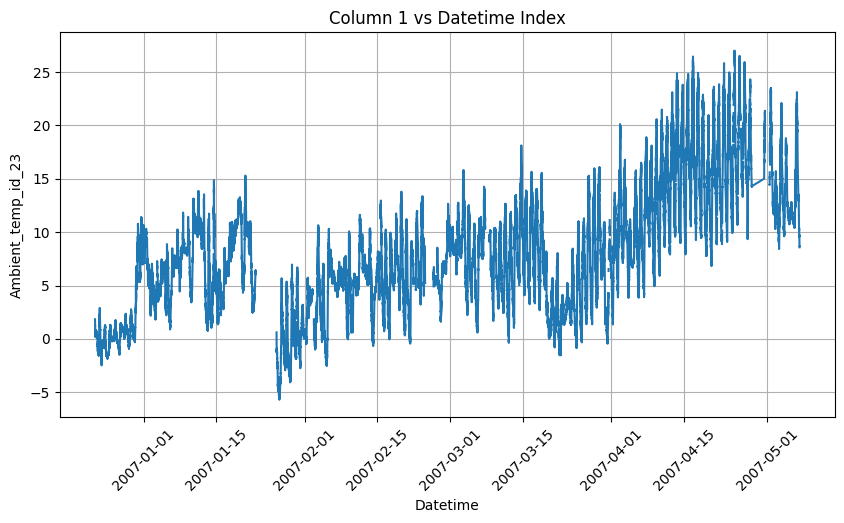

In [36]:
import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Ambient_temp_id_46'], linestyle='-')

# Formatting
plt.xlabel('Datetime')
plt.ylabel('Ambient_temp_id_23')
plt.title('Column 1 vs Datetime Index')
plt.xticks(rotation=45)
plt.grid(True)

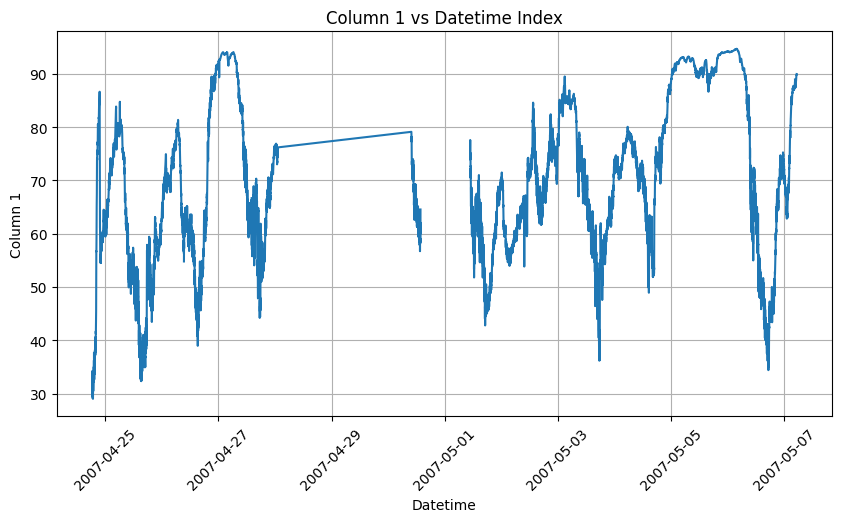

In [54]:
df.index = pd.to_datetime(df.index)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['humidity_id_26'])

# Formatting
plt.xlabel('Datetime')
plt.ylabel('Column 1')
plt.title('Column 1 vs Datetime Index')
plt.xticks(rotation=45)
plt.grid(True)

In [30]:
final_df.to_csv("final.csv")

In [15]:
def read_file(file_path):
    try:
        # Define column names
        columns = ["Station ID", "Year", "Month", "Day", "Hour", "Minute", "Second", 
                   "Time since the epoch [s]", "Sequence Number", "Ambient Temperature [°C]", 
                   "Surface Temperature [°C]", "Solar Radiation [W/m²]", "Relative Humidity [%]", 
                   "Soil Moisture [%]", "Watermark [kPa]", "Rain Meter [mm]", 
                   "Wind Speed [m/s]", "Wind Direction [°]"]
        
        # Read the file with space delimiter
        df = pd.read_csv(file_path, sep=r'\s+', header=None, names=columns)
        
        # Create a datetime column from Year, Month, Day, Hour, Minute, Second
        df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
        
        return df
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None


In [16]:
d=read_file("sensorscope-meteo-33.txt")

In [26]:
common_start ='2007-04-24 18:21:31'   
common_end ='2007-05-07 05:22:22'             
d[(d['Datetime'] >= common_start) & (d['Datetime'] <= common_end)].isna().sum()

Station ID                      0
Year                            0
Month                           0
Day                             0
Hour                            0
Minute                          0
Second                          0
Time since the epoch [s]        0
Sequence Number                 0
Ambient Temperature [°C]    13340
Surface Temperature [°C]    13344
Solar Radiation [W/m²]      23017
Relative Humidity [%]       10974
Soil Moisture [%]              30
Watermark [kPa]             22075
Rain Meter [mm]             23017
Wind Speed [m/s]            23017
Wind Direction [°]          23017
Datetime                        0
dtype: int64

In [19]:
d.isna().sum()

Station ID                       0
Year                             0
Month                            0
Day                              0
Hour                             0
Minute                           0
Second                           0
Time since the epoch [s]         0
Sequence Number                  0
Ambient Temperature [°C]     58616
Surface Temperature [°C]     25238
Solar Radiation [W/m²]      489204
Relative Humidity [%]        53721
Soil Moisture [%]           256719
Watermark [kPa]             375062
Rain Meter [mm]             489204
Wind Speed [m/s]            489204
Wind Direction [°]          489204
Datetime                         0
dtype: int64

In [63]:
final_df

,Ambient_temp_id_3,Ambient_temp_id_4,Ambient_temp_id_5,Ambient_temp_id_7,Ambient_temp_id_8,Ambient_temp_id_9,Ambient_temp_id_20,Ambient_temp_id_21,Ambient_temp_id_23,Ambient_temp_id_24,...,humidity_id_100,humidity_id_103,humidity_id_104,humidity_id_105,humidity_id_106,humidity_id_107,humidity_id_111,humidity_id_121,humidity_id_122,humidity_id_123
datatime_min,,,,,,,,,,,,,,,,,,,,,
2007-04-24 18:23:00,24.880000,26.360000,24.530,24.580,25.250,NaN,23.755,23.805,24.08,25.595,...,24.0245,NaN,25.7590,24.8970,NaN,26.8930,24.674000,32.185333,26.9510,27.000000
2007-04-24 18:24:00,24.840000,26.238333,24.330,24.395,24.990,27.06,23.695,23.715,24.06,25.600,...,24.9880,NaN,25.7340,24.8990,NaN,26.6030,24.561500,31.094429,26.9830,26.478500
2007-04-24 18:25:00,24.740000,26.317143,24.470,24.350,25.055,26.61,23.685,23.655,24.05,25.575,...,25.2965,NaN,26.1040,25.1035,NaN,26.7085,24.885333,30.717167,26.5215,27.722000
2007-04-24 18:26:00,24.683333,26.323333,24.465,24.475,25.020,27.03,23.760,23.775,23.98,25.645,...,25.7650,NaN,25.5590,25.1535,NaN,27.3045,24.164500,33.257000,26.4620,26.633333
2007-04-24 18:27:00,24.505000,26.466667,24.345,24.460,24.925,26.68,23.700,23.800,23.93,25.630,...,24.6560,25.5375,25.3610,24.8245,NaN,27.0915,23.888500,30.988500,26.1765,26.117500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-05-07 05:18:00,8.100000,9.944286,7.005,9.210,7.570,9.26,NaN,8.500,8.35,9.595,...,81.3025,81.7335,79.4330,NaN,NaN,79.4100,79.210000,76.226000,63.4550,70.721500
2007-05-07 05:19:00,8.195000,9.961667,7.120,9.170,7.555,9.08,NaN,8.495,8.33,9.600,...,81.5760,81.8675,79.4315,NaN,NaN,79.4595,79.496667,76.958500,63.4790,70.876000
2007-05-07 05:20:00,8.245000,9.931667,7.170,9.180,7.580,9.16,NaN,8.490,8.33,9.575,...,82.1590,82.0155,79.4280,NaN,NaN,79.3360,79.898500,77.796800,63.5500,71.194000
